In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import the dataset
data = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.shape

(13320, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
#get the value counts of all the values in each column
for column in data.columns:
    print(data[column].value_counts())
    print('*'*30)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
******************************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
14-Nov               1
16-Jul               1
14-Jul               1
15-Jun               1
16-Jan               1
Name: availability, Length: 81, dtype: int64
******************************
Whitefield                  540
Sarjapur  Road              399
Electronic City             302
Kanakpura Road              273
Thanisandra                 234
                           ... 
Sulthangunta                  1
Annasandrapalya               1
Basnashankari,6th stage,      1
CHIKKATIRUPATHI               1
Shakthi Nagar                 1
Name: location, Length: 1305, dtype: int64
******************************
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK      

In [8]:
#find the number of null values in each column
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
#since society and balcony have lots of null values, we drop those columns
data.drop(columns = ['area_type', 'society', 'balcony'], inplace = True)

In [10]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [11]:
data['location'].value_counts()

Whitefield                  540
Sarjapur  Road              399
Electronic City             302
Kanakpura Road              273
Thanisandra                 234
                           ... 
Sulthangunta                  1
Annasandrapalya               1
Basnashankari,6th stage,      1
CHIKKATIRUPATHI               1
Shakthi Nagar                 1
Name: location, Length: 1305, dtype: int64

In [12]:
#fill the null value in location column with the value that is most repeating
data['location'] = data['location'].fillna('Whitefield')

In [13]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 BHK           2
11 Bedroom       2
18 Bedroom       1
43 Bedroom       1
19 BHK           1
12 Bedroom       1
14 BHK           1
13 BHK           1
16 BHK           1
27 BHK           1
Name: size, dtype: int64

In [14]:
#fill the null values in size column with the value that is most repeating
data['size'] = data['size'].fillna('2 BHK')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   availability  13320 non-null  object 
 1   location      13320 non-null  object 
 2   size          13320 non-null  object 
 3   total_sqft    13320 non-null  object 
 4   bath          13247 non-null  float64
 5   price         13320 non-null  float64
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [16]:
#fill the null values in bath column, using the median of that column
data['bath'] = data['bath'].fillna(data['bath'].median())

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   availability  13320 non-null  object 
 1   location      13320 non-null  object 
 2   size          13320 non-null  object 
 3   total_sqft    13320 non-null  object 
 4   bath          13320 non-null  float64
 5   price         13320 non-null  float64
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [18]:
#filter the bhk column by keeping only the number of bedrooms and removing the strings such as 'bhk', 'bedroom'
data['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [19]:
#houses with more than 20 bedrooms, are more likely to be errors in the data and can lead to outliers
data[data.bhk > 20]

,availability,location,size,total_sqft,bath,price,bhk
1718,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
#function to convert the range the total_sqft value from range to a single value
def convertRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1])) / 2
    try:
        return float(x)
    except:
        return None

In [22]:
data['total_sqft'] = data['total_sqft'].apply(convertRange)

In [23]:
data.head()

,availability,location,size,total_sqft,bath,price,bhk
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
data.drop(columns = 'size', inplace = True)

In [25]:
#price per square feet is calculated to remove outliers in the data
data['price_per_sqft'] = data['price']*100000 / data['total_sqft']

In [26]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [27]:
data['location'].value_counts()

Whitefield                  541
Sarjapur  Road              399
Electronic City             302
Kanakpura Road              273
Thanisandra                 234
                           ... 
Sulthangunta                  1
Annasandrapalya               1
Basnashankari,6th stage,      1
CHIKKATIRUPATHI               1
Shakthi Nagar                 1
Name: location, Length: 1305, dtype: int64

In [28]:
data['location'] = data['location'].apply(lambda x : x.strip())
location_count = data['location'].value_counts()

In [29]:
#remove all the locations that have less than 10 houses and update that location as 'others'
location_count_less_10 = location_count[location_count <= 10]
location_count_less_10

Nagadevanahalli      10
Ganga Nagar          10
BTM 1st Stage        10
Dairy Circle         10
Basapura             10
                     ..
Gokaula Extension     1
M C Layout            1
Junnasandra           1
Brigade Road          1
Thyagraj Nagar        1
Name: location, Length: 1053, dtype: int64

In [30]:
data['location'] = data['location'].apply(lambda x : 'other' if x in location_count_less_10 else x)

In [31]:
data['location'].value_counts()

other                        2885
Whitefield                    542
Sarjapur  Road                399
Electronic City               304
Kanakpura Road                273
                             ... 
2nd Phase Judicial Layout      11
Tindlu                         11
Thyagaraja Nagar               11
Marsur                         11
Pattandur Agrahara             11
Name: location, Length: 242, dtype: int64

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

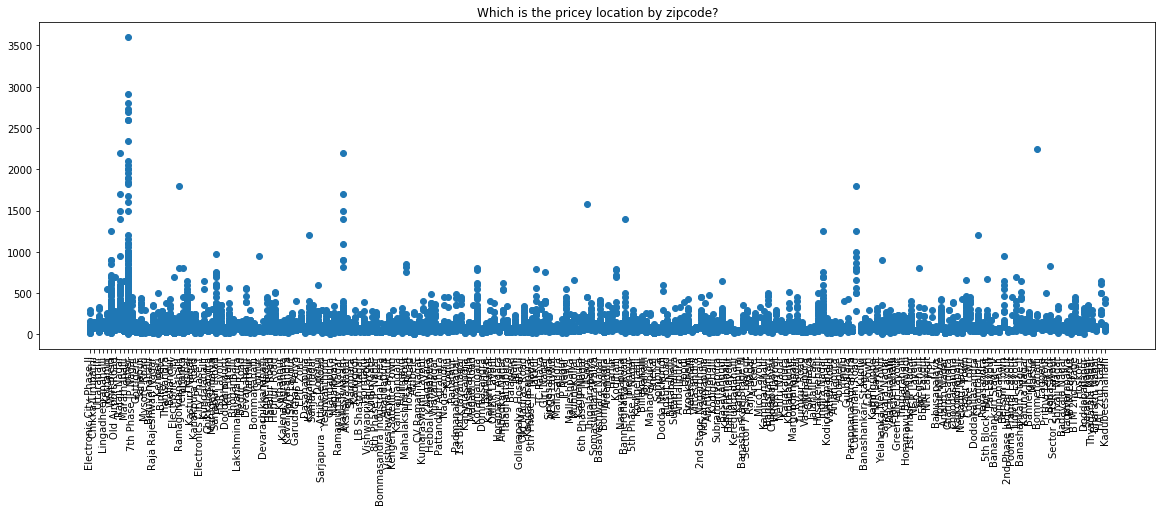

In [32]:
plt.figure(figsize = (20, 6))
plt.scatter(data.location,data.price)
plt.xticks(rotation=90)
plt.title("Which is the pricey location by zipcode?")

Text(0.5, 1.0, 'Price of the house compared to the number of bedrooms')

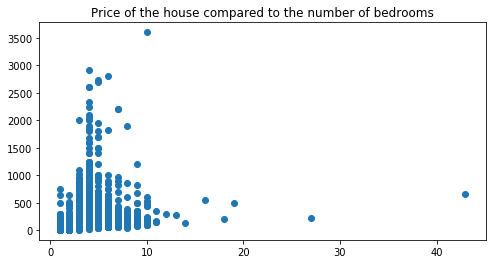

In [33]:
plt.figure(figsize = (8, 4))
plt.scatter(data.bhk,data.price)
plt.title("Price of the house compared to the number of bedrooms")

In [34]:
#We can clearly see that there are outliers in the data which needs to be fixed

In [35]:
#find out the area occupied by one bedroom as compared to the whole house, and remove the outliers
(data['total_sqft'] / data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [36]:
data = data[((data['total_sqft'] / data['bhk']) >= 300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [37]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [38]:
#function to remove outliers in location
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_output = pd.concat([df_output, gen_df], ignore_index = True)
    return df_output
data = remove_outliers_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [39]:
#function to remove outliers in bedroom column
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')    
            

In [40]:
data = bhk_outlier_remover(data)

In [41]:
data.shape

(7361, 7)

In [42]:
data

,availability,location,total_sqft,bath,price,bhk,price_per_sqft
0,20-May,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,18-Jun,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,Ready To Move,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,15-Dec,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,18-Jun,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10292,19-Jan,other,1200.0,2.0,70.0,2,5833.333333
10293,Ready To Move,other,1800.0,1.0,200.0,1,11111.111111
10296,Ready To Move,other,1353.0,2.0,110.0,2,8130.081301
10297,18-Jan,other,812.0,1.0,26.0,1,3201.970443


In [43]:
data.drop(columns = ['availability'], inplace = True)

In [44]:
data.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [45]:
#split the data into features and target columns
X = data.drop(columns = ['price'])
y = data['price']

In [46]:
#import the necessary libraries to build the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [47]:
#split the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
print(X_train.shape)
print(X_test.shape)

(5888, 5)
(1473, 5)


In [49]:
column_trans = make_column_transformer((OneHotEncoder(sparse = False), ['location']),
                                      remainder = 'passthrough')

In [50]:
scaler = StandardScaler()

In [51]:
lr = LinearRegression(normalize = True)

In [52]:
pipe = make_pipeline(column_trans, scaler, lr)

In [53]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['location'])],
                                   verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregressio

In [54]:
y_pred = pipe.predict(X_test)

In [55]:
r2_score(y_test, y_pred)

0.9165543109055118

## The model gave an r2 score of 91.65%